## Chest X-ray
**By : Zamzam Alsarayrah**

In [1]:
# Import libraries and modules
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf, keras
from keras import Model
from tensorflow.keras.applications import EfficientNetB3, VGG16, VGG19, ResNet50, InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from pathlib import Path as path
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle
# Set a random seed.
##install cv2
#pip install opencv-python-headless
#pip install opencv-contrib-python-headless
import os

In [2]:
# load the Dataset
data_train = np.load("dataverse_files (1)/Dataset5_raw_train.npz")
data_test = np.load("dataverse_files (1)/Dataset5_raw_test.npz")
data_val = np.load("dataverse_files (1)/Dataset5_raw_val.npz")

In [3]:
# Extract the images' pixels
img_content_train = (data_train['image']).astype('uint8')
img_content_test = (data_test['image']).astype('uint8')
img_content_val = (data_val['image']).astype('uint8')

In [4]:
# extract the images' labels
label_train = data_train['image_label']
label_test = data_test['image_label']
label_val = data_val['image_label']

## Base Model
For the base model we are going to input the image to a simple CNN with the structure of 2 CNN layers, 2 Maxpooling, 2 fully connected dense layers with relue activation and Droop
out with P =0.2. The classification will be done using the final dense layer with softmax activation function.

## Convolutional Neural Networks(CNN)

In [5]:
##Pre_proccessing of the data( scale and reshape)
# scale 
X_train = img_content_train.astype('float32')/255
X_test = img_content_test.astype('float32')/255
X_val = img_content_val.astype('float32')/255

In [6]:
# reshape
X_train = X_train.reshape(X_train.shape[0], 224, 224, 3)
X_test = X_test.reshape(X_test.shape[0], 224, 224, 3)
X_val = X_val.reshape(X_val.shape[0], 224, 224, 3)

In [7]:
##Pre-process the labels 
y_train = utils.to_categorical(label_train, 5)
y_test = utils.to_categorical(label_test, 5)
y_val = utils.to_categorical(label_val, 5)

In [10]:
cnn = Sequential()
# Add a Input Layer - Convolutional layer.
cnn.add(Conv2D(filters = 50,       #number of filters to use
                  kernel_size = (3, 3),   #dimensions of the filters
                  activation = 'relu',    #activation function
                  input_shape = (224, 224, 3)))  #shape of image
# dimensions of region of pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))   #filter dimensions
    
#Convolutional layer
cnn.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
    
#pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))
    
#dense layers
cnn.add(Flatten())
# Add a densely-connected layer with 128 neurons.
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(5, activation = 'softmax')) #add final layer with 10 nerous
    
# Compile model
cnn.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [11]:
# Fit model on training data.
history_cnn = cnn.fit(X_train, y_train, validation_data = (X_test, y_test),
                   batch_size = 256, # 19610/256 = 235 weight updates per epoch
                  epochs = 15,
                   verbose = 1) # verbose how many info you need to see not important

Epoch 1/15
77/77 [==============================] - 591s 8s/step - loss: 1.3444 - accuracy: 0.4588 - val_loss: 0.9956 - val_accuracy: 0.6177
Epoch 2/15
77/77 [==============================] - 592s 8s/step - loss: 1.0420 - accuracy: 0.5997 - val_loss: 0.8597 - val_accuracy: 0.6817
Epoch 3/15
77/77 [==============================] - 577s 8s/step - loss: 0.8511 - accuracy: 0.6812 - val_loss: 0.7377 - val_accuracy: 0.7176
Epoch 4/15
77/77 [==============================] - 578s 8s/step - loss: 0.8376 - accuracy: 0.6876 - val_loss: 0.7425 - val_accuracy: 0.7248
Epoch 5/15
77/77 [==============================] - 568s 7s/step - loss: 0.7059 - accuracy: 0.7394 - val_loss: 0.6914 - val_accuracy: 0.7465
Epoch 6/15
77/77 [==============================] - 574s 7s/step - loss: 0.6349 - accuracy: 0.7673 - val_loss: 0.7855 - val_accuracy: 0.7015
Epoch 7/15
77/77 [==============================] - 566s 7s/step - loss: 0.6023 - accuracy: 0.7792 - val_loss: 0.6588 - val_accuracy: 0.7667
Epoch 8/15
77

# Save the model 

In [24]:
CNN_json = cnn.to_json()

In [26]:
with open('./models/CNN_json', 'w') as json_file:
     json_file.write(CNN_json)

In [28]:
cnn.save_weights("models/cnn.h5")

In [15]:
def model_eval(cnn, history, data_train, data_test):
    # evaluate the model
    print(f'Evaluating Training Dataset')
    train_scores = cnn.evaluate(data_train, verbose=0)
    
    print(f'Evaluating Validation Dataset')
    val_scores = cnn.evaluate(data_test, verbose=0)
    
    # print(f'Evaluating Test Dataset')
    # test_scores = cnn.evaluate(test_images, verbose=0)
    
    print("Training Accuracy Score   = %.2f%%" % (train_scores[1]*100))
    print("Validation Accuracy Score = %.2f%%" % (val_scores[1]*100))
    # print("Testing Accuracy Score    = %.2f%%" % (test_scores[1]*100))
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    labels = ['Training', 'Validation']

    sns.lineplot(data=train_loss, ax=ax1)
    sns.lineplot(data=val_loss, ax=ax1)
    ax1.set_title('Training vs Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax1.legend(labels)

    sns.lineplot(data=train_accuracy, ax=ax2)
    sns.lineplot(data=val_accuracy, ax=ax2)
    ax2.set_title('Training vs Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax2.legend(labels)


    plt.subplots_adjust(wspace=0.15)
    # return fig
    
# take from Group project

Evaluating Training Dataset
Evaluating Validation Dataset
Training Accuracy Score   = 0.00%
Validation Accuracy Score = 0.00%


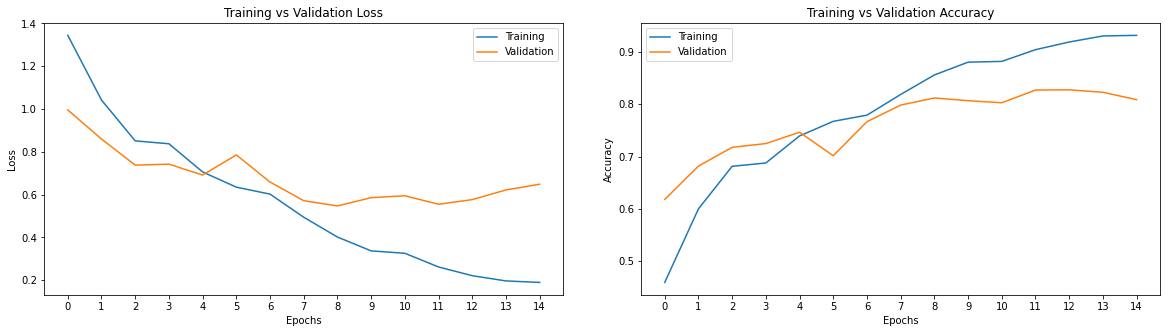

In [16]:
model_eval(cnn, history_cnn, X_train, X_test)

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 50)      1400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 50)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 16)      7216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               5972096   
_________________________________________________________________
dropout (Dropout)            (None, 128)              

## Feature Extraction
For feature extraction we are going to use two methods, one using PCA 
and the other using a pretrained CNN model (Vgg16).

Feature Extraction using PCA 

In [5]:
#Function to split the images into three arrayes (red,green, blue)
def image_splitter(images):
  #spilt the image(green, red, blue)
    red, green, blue = np.array_split(images, 3, axis=3)
  # flatten the channels arrays as one row for each image 
    #red
    red_flat = red.reshape(len(red),np.prod(red.shape[1:]))
    green_flat = green.reshape(len(green),np.prod(green.shape[1:]))
    blue_flat = blue.reshape(len(blue),np.prod(blue.shape[1:]))
    return red_flat, green_flat, blue_flat

In [6]:
#split the train images to the three channels (red, green,blue)we will get 3 arrays each with size(number of train images,50176)
#50176 is the number of features for each channel 
red_train, green_train, blue_train = image_splitter(img_content_train)

Apply PCA on the train image with number of component = 1000 to check what is the suitable number of component to use, and it covers all the variance in the features.

In [7]:
# before apply the PCA we have to scale the data 
#scale the pixel value
#red
s_red = MinMaxScaler().fit(red_train)
red_train_s = s_red.transform(red_train)
#green
s_green = MinMaxScaler().fit(green_train)
green_train_s = s_green.transform(green_train)
#blue
s_blue = MinMaxScaler().fit(blue_train)
blue_train_s = s_blue.transform(blue_train)

In [8]:
# apply the PCA with 1000 components on the scaled train data
pca = PCA(n_components=1000)
#red    
red_pca = pca.fit(red_train_s)
#green
green_pca = pca.fit(green_train_s)
#blue
blue_pca = pca.fit(blue_train_s)

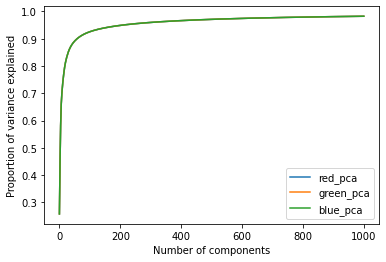

In [9]:
# Plot the explained_variance_ratio for the applied PCA to check if the number of componont is sufficent to cover at least 90% 
# of the variance in the data
plt.plot(np.cumsum(red_pca.explained_variance_ratio_), label = "red_pca")
plt.plot(np.cumsum(green_pca.explained_variance_ratio_), label = "green_pca")
plt.plot(np.cumsum(blue_pca.explained_variance_ratio_), label = "blue_pca")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained")
plt.legend()
plt.show()

**As seen from the plot above the used number of components is sufficient  to explain more than 90% of the variance in the train images.** 

In [10]:
# Fit the PCA on the training, test, val, but first split them and apply the scalar then fit 
red_test, green_test, blue_test = image_splitter(img_content_test)
red_val, green_val, blue_val = image_splitter(img_content_val)
red_test_s = s_red.transform(red_test)
green_test_s = s_green.transform(green_test)
blue_test_s = s_blue.transform(blue_test)
red_val_s = s_red.transform(red_val)
green_val_s = s_green.transform(green_val)
blue_val_s = s_blue.transform(blue_val)

In [11]:
##Fit the PCA
##train
train_pca_red= red_pca.transform(red_train_s)
train_pca_green= green_pca.transform(green_train_s)
train_pca_blue= blue_pca.transform(blue_train_s)
##test
test_pca_red= red_pca.transform(red_test_s)
test_pca_green= green_pca.transform(green_test_s)
test_pca_blue= blue_pca.transform(blue_test_s)
##val
val_pca_red= red_pca.transform(red_val_s)
val_pca_green= green_pca.transform(green_val_s)
val_pca_blue= blue_pca.transform(blue_val_s)

In [12]:
# combine the three channels in one array
train_pca = np.hstack((train_pca_red,train_pca_green,train_pca_blue))
test_pca = np.hstack((test_pca_red,test_pca_green,test_pca_blue))
val_pca = np.hstack((val_pca_red,val_pca_green,val_pca_blue))

In [13]:
# check the shape of each array, it should be (number of images, 3000)
train_pca.shape, test_pca.shape, val_pca.shape

((19610, 3000), (6540, 3000), (6534, 3000))

## Save the PCA features

In [14]:
import numpy as np
# Save as csv for the pca features
np.savetxt("train_PCA.csv", train_pca, delimiter=",")
# Save as csv for the pca features
np.savetxt("test_PCA.csv", test_pca, delimiter=",")
# Save as csv for the pca features
np.savetxt("val_PCA.csv", val_pca, delimiter=",")

## Classification using logistic regression

We are going to apply logistic regression to both feature with using regularization and gridresearch and pipline to search over the best
hyper-parameters to use.

In [49]:
# load the features from pca 
train_PCA = np.loadtxt('./models/pca-features/train_PCA.csv', delimiter=",")
test_PCA = np.loadtxt('./models/pca-features/test_PCA.csv', delimiter=",")
val_PCA = np.loadtxt('./models/pca-features/val_PCA.csv', delimiter=",")

In [18]:
def logistic(X_train,X_test,label_train,label_test):
## define the hyperparameters

    grid = {"max_iter":[140],"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    logreg = LogisticRegression(multi_class='multinomial',solver='saga')
    logreg_cv=RandomizedSearchCV(logreg,grid,cv=3)
    logreg_cv.fit(X_train,label_train)
    print('train_score:', logreg_cv.score(X_train, label_train))
    print('test_score:', logreg_cv.score(X_test, label_test))
    print('best_Parameters:', logreg_cv.best_params_)
    return logreg_cv


In [21]:
## train logistic on the PCA features
lr_PCA = logistic(train_PCA,test_PCA,label_train,label_test)

C:\Users\Malek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Malek\anaconda3\lib\site-packages\sklea

C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Malek\anaconda3\lib\site-packages\sklea

train_score: 0.7415604283528812
test_score: 0.6837920489296636
best_Parameters: {'penalty': 'l2', 'max_iter': 140, 'C': 0.01}


## Save the lr_PCA model

In [22]:
with open('./models/lr_PCA.pkl', 'wb') as pickle_out:
    pickled_lr_PCA = pickle.dump(lr_PCA, pickle_out)

## Classification using RandomForestClassifier

Same we did with the logistic regression we are going to repate it with the  RandomForestClassifier.

## RandomForestClassifier with vgg

In [36]:
rfc_vgg = RandomForestClassifier(n_estimators=1000, min_samples_split=7, min_samples_leaf=3)

In [37]:
rfc_vgg.fit(train_features_vgg,label_train)

<ipython-input-37-9883f8850ee6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_vgg.fit(train_features_vgg,label_train)


RandomForestClassifier(min_samples_leaf=3, min_samples_split=7,
                       n_estimators=1000)

In [38]:
rfc_vgg.score(train_features_vgg,label_train),rfc_vgg.score(test_features_vgg,label_test)

(0.9969403365629781, 0.767737003058104)

In [39]:
## save the rfc_vgg model
with open('./models/rfc_vgg.pkl', 'wb') as pickle_out:
    pickled_rfc_vgg = pickle.dump(rfc_vgg, pickle_out)

### RandomForestClassifier with pca

In [41]:
## train rfc on the PCA features
rfc_pca = RandomForestClassifier(n_estimators=1000, min_samples_split=7, min_samples_leaf=3)

In [51]:
rfc_pca.fit(train_PCA,label_train)

<ipython-input-51-b537bb89d758>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_pca.fit(train_PCA,label_train)


RandomForestClassifier(min_samples_leaf=3, min_samples_split=7,
                       n_estimators=1000)

In [52]:
# check the score for test and train 
rfc_pca.score(train_PCA,label_train),rfc_pca.score(test_PCA,label_test)

(0.9998470168281489, 0.5860856269113149)

In [53]:
## save the rfc_PCA model
with open('./models/rfc_pca.pkl', 'wb') as pickle_out:
    pickled_rfc_PCA = pickle.dump(rfc_pca, pickle_out)

## Feature extraction using VGG16
 In this step we are going to use a pre-trained network  on large-scale datasets such as ImageNet and COCO.
 These pre-trained networks has proven itself in the feature extraction and transfer learning process as they were trained
 on a set of rich, discriminative features capable of recognizing 100s to 1,000s of object classes.
 What we are going to do is to use this network to extract the most important feature of the image by input the image to the
 network and chopped out the final fully connected layers from the network a set of rich, discriminative features capable of recognizing 100s to 1,000s of object classes k so it will not output the class rather than it will
 output the output feature of the final Maxpool layer.

- VGG16 is a deep CNN network  pretrained on imagenet data set

In [18]:
# call the VGG16 model
vgg = VGG16(weights="imagenet", include_top=False)

# we put include_top=False, so the the fully-connected head with the softmax classifier of the VGG16 wil not be included.

In [8]:
# before input the images to the feature extractor we have to reshape it and scale it
# reshape
X_train_vgg = img_content_train.reshape(img_content_train.shape[0], 224, 224, 3)
X_test_vgg = img_content_test.reshape(img_content_test.shape[0], 224, 224, 3)
X_val_vgg = img_content_val.reshape(img_content_val.shape[0], 224, 224, 3)

# scale using vgg preprocessing
X_train_vgg = preprocess_input(X_train_vgg)
X_test_vgg = preprocess_input(X_test_vgg)
X_val_vgg = preprocess_input(X_val_vgg)

In [9]:
# extract the features
train_features_vgg = vgg.predict(X_train_vgg )
test_features_vgg = vgg.predict(X_test_vgg )
val_features_vgg = vgg.predict(X_val_vgg )

In [11]:
train_features_vgg.shape

(19610, 7, 7, 512)

In [15]:
train_features_vgg = np.array(train_features_vgg)
test_features_vgg = np.array(test_features_vgg)
val_features_vgg = np.array(val_features_vgg)

In [17]:
# flatten the features array to the size (number of image, 7 * 7 * 512) we choose the size 7 * 7 * 512 as the last max-pooling 
#layer of the vgg will have an output shape of 7 x 7 x 512. Flattening, this volume into a feature vector we would obtain a 
#list of 7 x 7 x 512 = 25,088 features for each image.

# these features will be used as an input to a classifier to classify the images.
train_features_vgg = train_features_vgg.reshape((train_features_vgg.shape[0], 7 * 7 * 512))
test_features_vgg = test_features_vgg.reshape((test_features_vgg.shape[0], 7 * 7 * 512))
val_features_vgg = val_features_vgg.reshape((val_features_vgg.shape[0], 7 * 7 * 512))

## Save as csv for the vgg features

In [30]:
# Save as csv for the vgg features
np.savetxt("train_vgg.csv", train_features_vgg, delimiter=",")
# Save as csv for the pca features
np.savetxt("test_vgg.csv", test_features_vgg, delimiter=",")
# Save as csv for the pca features
np.savetxt("val_vgg.csv", val_features_vgg, delimiter=",")

In [7]:
train_features_vgg = np.loadtxt('./models/vgg-features/train_vgg.csv', delimiter=",")
test_features_vgg = np.loadtxt('./models/vgg-features/test_vgg.csv', delimiter=",")
val_features_vgg = np.loadtxt('./models/vgg-features/val_vgg.csv', delimiter=",")

## model vgg with Logistic Regression (gridsearch)

In [13]:
lr_vgg = LogisticRegression(multi_class="multinomial", solver="saga",  penalty='l2')

In [14]:
# train logistic on the VGG16 features
lr_vgg.fit(train_features_vgg,label_train)

C:\Users\Malek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(multi_class='multinomial', solver='saga')

In [24]:
# check the score for test and train 
lr_vgg.score(train_features_vgg,label_train),lr_vgg.score(test_features_vgg,label_test)

(1.0, 0.9100917431192661)

## Results:
From the table above witch shows the train and test accuracy for the different models we have applied, we can see that all of them has an overfit. The one with the best performance among them is the vgg16 with logistic regression, it has a 1 train accuracy and 0.91 test accuracy. If we would pick one model from the above model we will pick the vgg16 with logistic regression. We can notice that the PCA for feature extraction and then apply simple classification models didn’t work well. Even though the features extracted using the PCA covers almost more than 90% of the variance on the images, it didn’t do well in the classification. The base model we have did good work compare to the other models.